##Albumentation Data Sampling

Development Environment
<br/>Class Imbalance
<br/>Samping by Number of Object
<br/>Samping by Image Size
<br/>Sampling Data Information
<br/>Data File I/O

#Development Environment

In [ ]:
import shutil
from glob import glob

In [ ]:
import numpy as np
import scipy
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import zscore

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles

In [ ]:
import pandas as pd
from termcolor import colored
from IPython.display import HTML
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Class Imbalance

In [ ]:
#confusion matrix 

#Train Data Sampling

##Samping by Number of Object

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/eda/tif_file_class_frequency/train_tif_detailed_class_frequency.csv')
column_list = list(train_df); vehicle_list = column_list[1:11]
ship_list = column_list[11:20]; airplane_list = column_list[21:]

train_df['Vehicle'] = train_df[vehicle_list].sum(axis=1); train_df['Ship'] = train_df[ship_list].sum(axis=1)
train_df['Airplane'] = train_df[airplane_list].sum(axis=1); train_df['Total'] = train_df[column_list].sum(axis=1)

train_sum_df = train_df[['File', 'Vehicle','Ship', 'Airplane', 'Total']]
train_sum_df.columns = ['file', 'vehicle','ship', 'airplane', 'total']

train_sum_z_score_df = train_sum_df[['vehicle','ship', 'airplane', 'total']].apply(zscore)

[How to make a normal distribution graph from data frame in Python?](https://stackoverflow.com/questions/71287607/how-to-make-a-normal-distribution-graph-from-data-frame-in-python)

Train Data



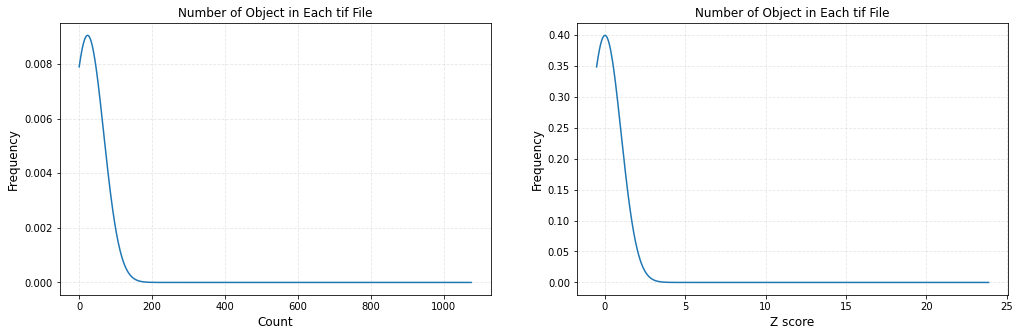

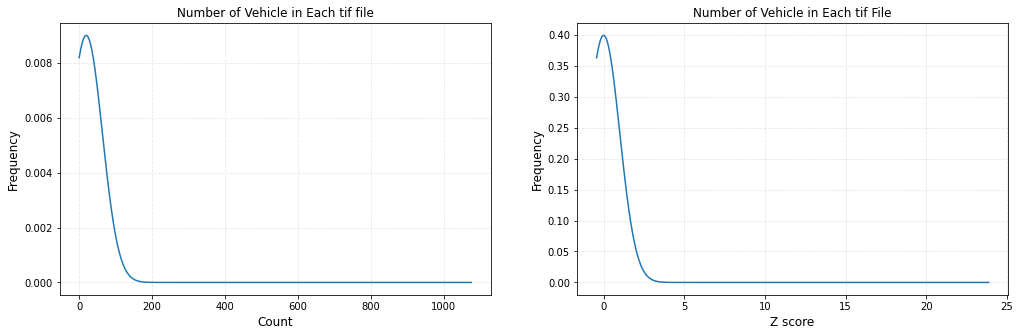

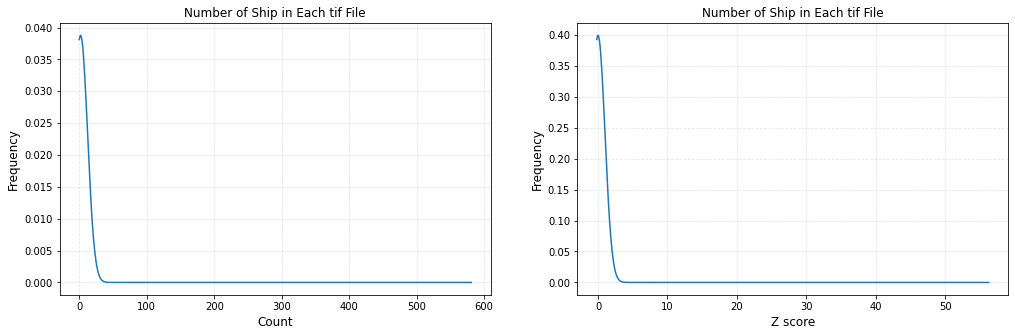

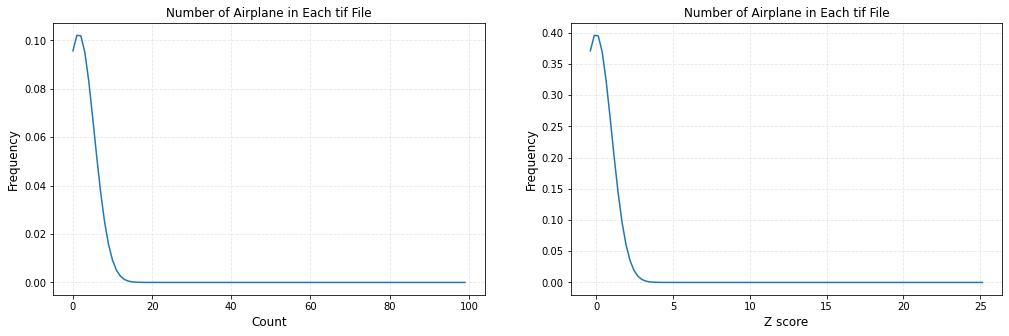

In [ ]:
print(colored("Train Data", attrs=['bold']))
print()

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(train_sum_df['total'])
df_std = np.std(train_sum_df['total'])
 
pdf = stats.norm.pdf(train_sum_df['total'].sort_values(), df_mean, df_std)

plt.title("Number of Object in Each tif File")
plt.plot(train_sum_df['total'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(train_sum_z_score_df['total'])
df_std = np.std(train_sum_z_score_df['total'])
 
pdf = stats.norm.pdf(train_sum_z_score_df['total'].sort_values(), df_mean, df_std)

plt.title("Number of Object in Each tif File")
plt.plot(train_sum_z_score_df['total'].sort_values(), pdf)
plt.xlabel("Z score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_number_of_obejct_distribution_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n" * 2)

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(train_sum_df['vehicle'])
df_std = np.std(train_sum_df['vehicle'])
 
pdf = stats.norm.pdf(train_sum_df['vehicle'].sort_values(), df_mean, df_std)

plt.title("Number of Vehicle in Each tif file")
plt.plot(train_sum_df['vehicle'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(train_sum_z_score_df['vehicle'])
df_std = np.std(train_sum_z_score_df['vehicle'])
 
pdf = stats.norm.pdf(train_sum_z_score_df['vehicle'].sort_values(), df_mean, df_std)

plt.title("Number of Vehicle in Each tif File")
plt.plot(train_sum_z_score_df['vehicle'].sort_values(), pdf)
plt.xlabel("Z score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_number_of_vehicle_distribution_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n" * 2)

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(train_sum_df['ship'])
df_std = np.std(train_sum_df['ship'])
 
pdf = stats.norm.pdf(train_sum_df['ship'].sort_values(), df_mean, df_std)

plt.title("Number of Ship in Each tif File")
plt.plot(train_sum_df['ship'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(train_sum_z_score_df['ship'])
df_std = np.std(train_sum_z_score_df['ship'])
 
pdf = stats.norm.pdf(train_sum_z_score_df['ship'].sort_values(), df_mean, df_std)

plt.title("Number of Ship in Each tif File")
plt.plot(train_sum_z_score_df['ship'].sort_values(), pdf)
plt.xlabel("Z score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_number_of_ship_distribution_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n" * 2)

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(train_sum_df['airplane'])
df_std = np.std(train_sum_df['airplane'])
 
pdf = stats.norm.pdf(train_sum_df['airplane'].sort_values(), df_mean, df_std)

plt.title("Number of Airplane in Each tif File")
plt.plot(train_sum_df['airplane'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(train_sum_z_score_df['airplane'])
df_std = np.std(train_sum_z_score_df['airplane'])
 
pdf = stats.norm.pdf(train_sum_z_score_df['airplane'].sort_values(), df_mean, df_std)

plt.title("Number of Airplane in Each tif File")
plt.plot(train_sum_z_score_df['airplane'].sort_values(), pdf)
plt.xlabel("Z score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_number_of_airplane_distribution_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

Train Data



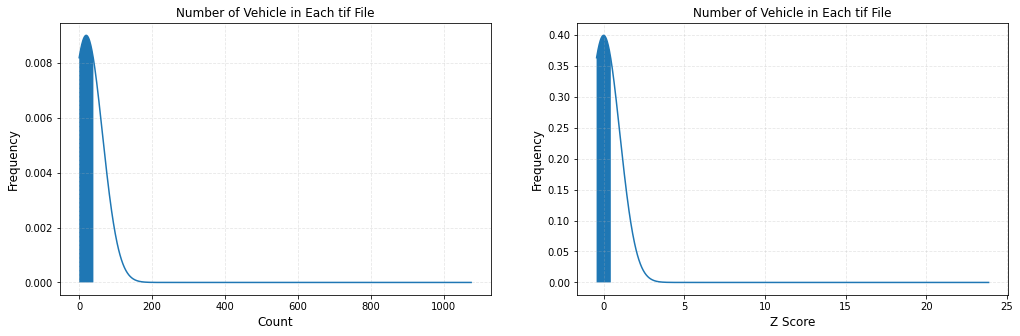

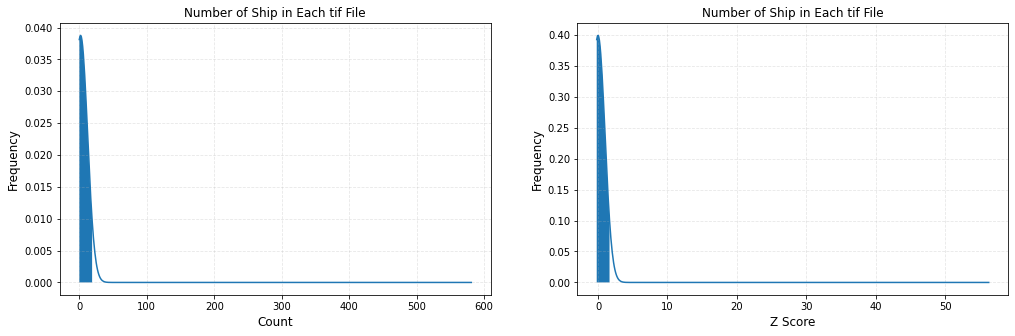

In [ ]:
print(colored("Train Data", attrs=['bold']))
print()

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(train_sum_df['vehicle'])
df_std = np.std(train_sum_df['vehicle'])
 
pdf = stats.norm.pdf(train_sum_df['vehicle'].sort_values(), df_mean, df_std)
border = train_sum_df['vehicle'][(train_sum_df['vehicle'] == 40)].index[0]
z = list(train_sum_df['vehicle'].sort_values()[train_sum_df['vehicle'].sort_values() < train_sum_df['vehicle'][border]])
mu = np.mean(train_sum_df['vehicle'])
sigma = stats.tstd(train_sum_df['vehicle'])
plt.fill_between(z, 0, norm.pdf(z, mu, sigma))

plt.title("Number of Vehicle in Each tif File")
plt.plot(train_sum_df['vehicle'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(train_sum_z_score_df['vehicle'])
df_std = np.std(train_sum_z_score_df['vehicle'])
 
pdf = stats.norm.pdf(train_sum_z_score_df['vehicle'].sort_values(), df_mean, df_std)
border = train_sum_df['vehicle'][(train_sum_df['vehicle'] == 40)].index[0]
z = list(train_sum_z_score_df['vehicle'].sort_values()[train_sum_z_score_df['vehicle'].sort_values() < train_sum_z_score_df['vehicle'][border]])
mu = np.mean(train_sum_z_score_df['vehicle'])
sigma = stats.tstd(train_sum_z_score_df['vehicle'])
plt.fill_between(z, 0, norm.pdf(z, mu, sigma))

plt.title("Number of Vehicle in Each tif File")
plt.plot(train_sum_z_score_df['vehicle'].sort_values(), pdf)
plt.xlabel("Z Score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_number_of_vehicle_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n" * 2)

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(train_sum_df['ship'])
df_std = np.std(train_sum_df['ship'])
 
pdf = stats.norm.pdf(train_sum_df['ship'].sort_values(), df_mean, df_std)
border = train_sum_df['ship'][(train_sum_df['ship'] == 20)].index[0]
z = list(train_sum_df['ship'].sort_values()[train_sum_df['ship'].sort_values() < train_sum_df['ship'][border]])
mu = np.mean(train_sum_df['ship'])
sigma = stats.tstd(train_sum_df['ship'])
plt.fill_between(z, 0, norm.pdf(z, mu, sigma))

plt.title("Number of Ship in Each tif File")
plt.plot(train_sum_df['ship'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(train_sum_z_score_df['ship'])
df_std = np.std(train_sum_z_score_df['ship'])
 
pdf = stats.norm.pdf(train_sum_z_score_df['ship'].sort_values(), df_mean, df_std)
border = train_sum_df['ship'][(train_sum_df['ship'] == 20)].index[0]
z = list(train_sum_z_score_df['ship'].sort_values()[train_sum_z_score_df['ship'].sort_values() < train_sum_z_score_df['ship'][border]])
mu = np.mean(train_sum_z_score_df['ship'])
sigma = stats.tstd(train_sum_z_score_df['ship'])
plt.fill_between(z, 0, norm.pdf(z, mu, sigma))

plt.title("Number of Ship in Each tif File")
plt.plot(train_sum_z_score_df['ship'].sort_values(), pdf)
plt.xlabel("Z Score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_number_of_ship_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

In [ ]:
train_sum_sampling_df = train_sum_df[(((train_sum_df['vehicle'] > 0) & (train_sum_df['vehicle'] <= 40)) |
                                          ((train_sum_df['ship'] > 0) & (train_sum_df['ship'] <= 20)))]
                                          
train_sum_detailed_sampling_df = train_df.iloc[train_sum_sampling_df.index]

In [ ]:
train_sum_sampling_df

,file,vehicle,ship,airplane,total
0,0.tif,0,3,0,3
6,6.tif,51,20,0,71
9,9.tif,3,1,0,4
10,10.tif,0,5,0,5
11,11.tif,0,2,0,2
...,...,...,...,...,...
16472,16472.tif,28,0,0,28
16475,16475.tif,23,0,0,23
16477,16477.tif,0,3,0,3
16479,16479.tif,17,0,0,17


##Samping by Image Size

In [ ]:
train_image_size_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/eda/image_size/df/train_image_size_df.csv')

In [ ]:
print(colored("Train Data", attrs=['bold']))
print()
print(train_image_size_df['size'].unique())

Train Data

['(1500, 1500)' '(1000, 1000)' '(3000, 3000)' '(5000, 5000)' '(800, 600)'
 '(600, 800)' '(700, 700)' '(900, 900)' '(2000, 2000)' '(800, 800)'
 '(600, 600)' '(4405, 5960)' '(4000, 4000)' '(3762, 3325)' '(7000, 6909)'
 '(7000, 7000)' '(3334, 3601)' '(3070, 2969)' '(5237, 5748)'
 '(5833, 6025)' '(6000, 6000)' '(5387, 6393)' '(5786, 5891)'
 '(4387, 4420)' '(3712, 3600)' '(4426, 5934)' '(4797, 4443)'
 '(4321, 4288)' '(4946, 4701)' '(3970, 4141)' '(3842, 3744)'
 '(4137, 4103)' '(5712, 5877)' '(5513, 4956)' '(3106, 3709)'
 '(6921, 7000)' '(4155, 4409)']


In [ ]:
train_image_sampling_df = train_image_size_df[((train_image_size_df['size'] == '(600, 600)') | (train_image_size_df['size'] == '(600, 800)') |
                                               (train_image_size_df['size'] == '(700, 700)') | (train_image_size_df['size'] == '(800, 600)') |
                                               (train_image_size_df['size'] == '(800, 800)') | (train_image_size_df['size'] == '(900, 900)') |
                                               (train_image_size_df['size'] == '(1000, 1000)') | (train_image_size_df['size'] == '(1500, 1500)'))]

In [ ]:
train_sampling_index = list(set(train_image_sampling_df.index) & set(train_sum_sampling_df.index))
train_sampling_index = sorted(train_sampling_index, reverse=False)
train_sum_image_sampling_df = train_sum_sampling_df.loc[train_sampling_index]

train_sum_image_detailed_sampling_df = train_df.iloc[train_sum_image_sampling_df.index]

In [ ]:
train_sampling_class_sum_df = pd.DataFrame(train_sum_image_sampling_df.sum()).reset_index().drop([0, 4])
train_sampling_class_sum_df.columns = ['value', 'count']

train_sampling_detailed_class_sum_df = pd.DataFrame(train_sum_image_detailed_sampling_df.sum()).reset_index().drop([0, 34])
train_sampling_detailed_class_sum_df.columns = ['value', 'count']
train_sampling_detailed_class_sum_df = train_sampling_detailed_class_sum_df.drop([31,32,33]) 
train_sampling_vehicle_class_sum_df = train_sampling_detailed_class_sum_df[train_sampling_detailed_class_sum_df['value'].str.contains('|'.join(vehicle_list))]
train_sampling_ship_class_sum_df = train_sampling_detailed_class_sum_df[train_sampling_detailed_class_sum_df['value'].str.contains('|'.join(ship_list))]
train_sampling_airplane_class_sum_df = train_sampling_detailed_class_sum_df[train_sampling_detailed_class_sum_df['value'].str.contains('|'.join(airplane_list))]

In [ ]:
train_sampling_class_sum_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/count/train_class_sampling_count.csv', index = False)
train_sampling_detailed_class_sum_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/count/train_detailed_class_sampling_count.csv', index = False)
train_sampling_vehicle_class_sum_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/count/train_vehicle_sampling_count.csv', index = False)
train_sampling_ship_class_sum_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/count/train_ship_sampling_count.csv', index = False)
train_sampling_airplane_class_sum_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/count/train_airplane_sampling_count.csv', index = False)

##Sampling Data Information

Train Data



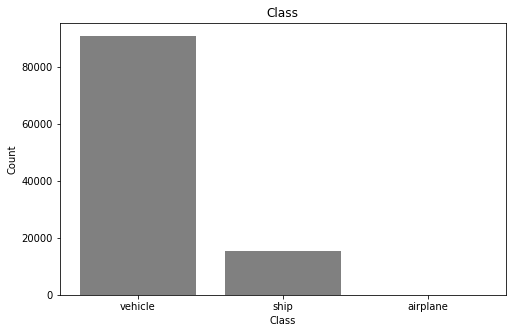

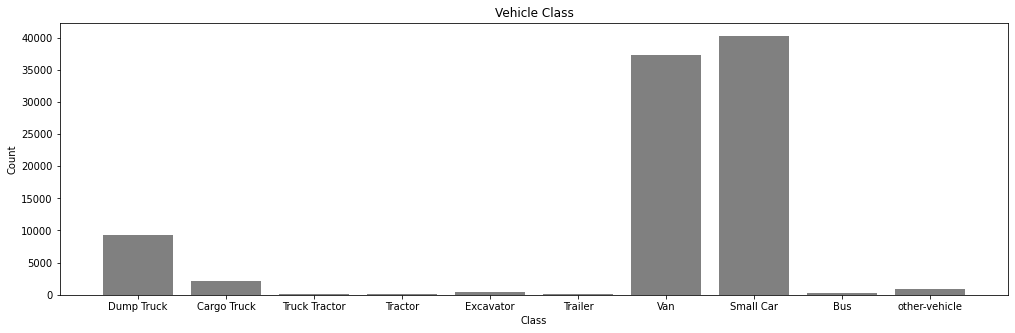

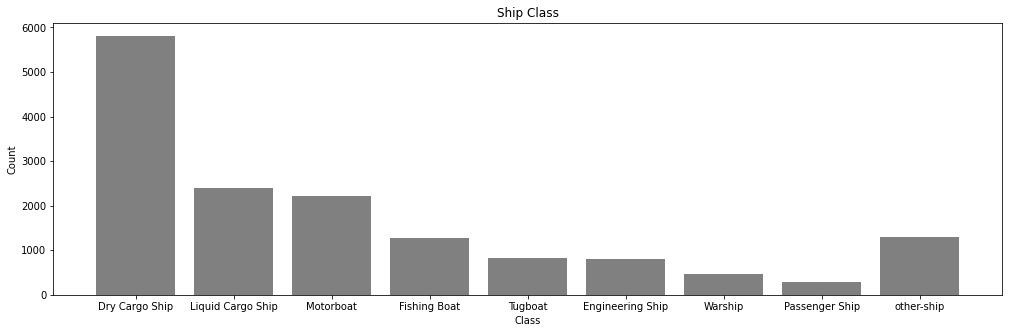

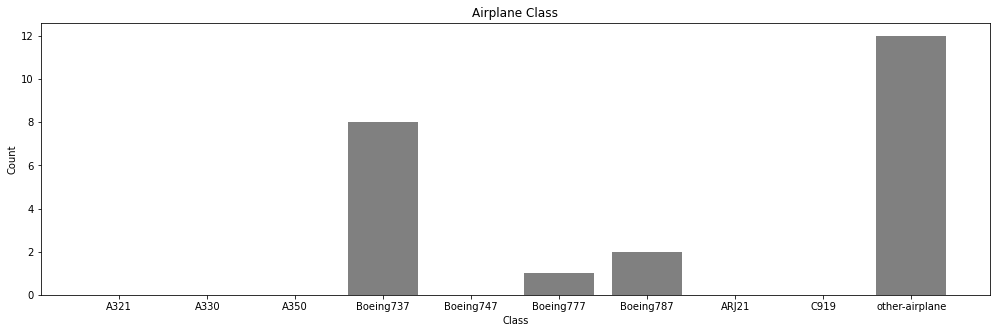

In [ ]:
print(colored("Train Data", attrs=['bold']))
print()

xs = train_sampling_class_sum_df.value.to_list()
ys = train_sampling_class_sum_df['count'].to_list()

plt.figure(figsize=(8, 5))
plt.title('Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.bar(xs, ys, width=0.8, color='gray')
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_class_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n"*2)

xs = train_sampling_vehicle_class_sum_df.value.to_list()
ys = train_sampling_vehicle_class_sum_df['count'].to_list()

plt.figure(figsize=(17, 5))
plt.title('Vehicle Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.bar(xs, ys, width=0.8, color='gray')
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_vehicle_class_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n"*2)

xs = train_sampling_ship_class_sum_df.value.to_list()
ys = train_sampling_ship_class_sum_df['count'].to_list()

plt.figure(figsize=(17, 5))
plt.title('Ship Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.bar(xs, ys, width=0.8, color='gray')
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_ship_class_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n"*2)

xs =train_sampling_airplane_class_sum_df.value.to_list()
ys =train_sampling_airplane_class_sum_df['count'].to_list()

plt.figure(figsize=(17, 5))
plt.title('Airplane Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.bar(xs, ys, width=0.8, color='gray')
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_airplane_class_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

#Validation Data Sampling

##Samping by Number of Object

In [ ]:
validation_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/eda/tif_file_class_frequency/validation_tif_detailed_class_frequency.csv')
column_list = list(validation_df); vehicle_list = column_list[1:11]
ship_list = column_list[11:20]; airplane_list = column_list[21:]

validation_df['Vehicle'] = validation_df[vehicle_list].sum(axis=1); validation_df['Ship'] = validation_df[ship_list].sum(axis=1)
validation_df['Airplane'] = validation_df[airplane_list].sum(axis=1); validation_df['Total'] = validation_df[column_list].sum(axis=1)

validation_sum_df = validation_df[['File', 'Vehicle','Ship', 'Airplane', 'Total']]
validation_sum_df.columns = ['file', 'vehicle','ship', 'airplane', 'total']

validation_sum_z_score_df = validation_sum_df[['vehicle','ship', 'airplane', 'total']].apply(zscore)

[How to make a normal distribution graph from data frame in Python?](https://stackoverflow.com/questions/71287607/how-to-make-a-normal-distribution-graph-from-data-frame-in-python)

Validation Data



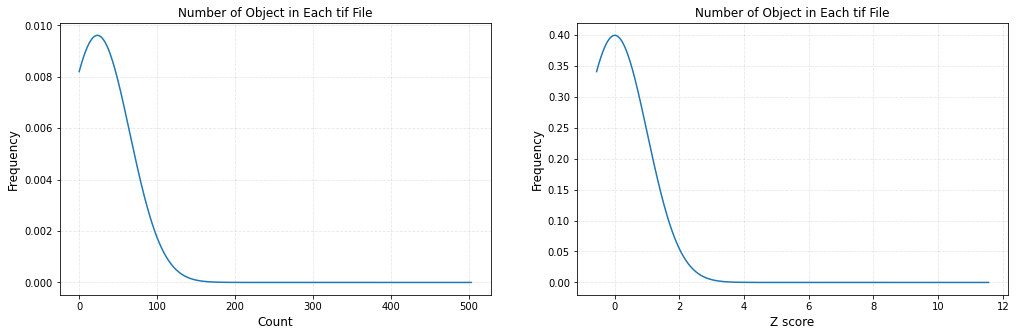

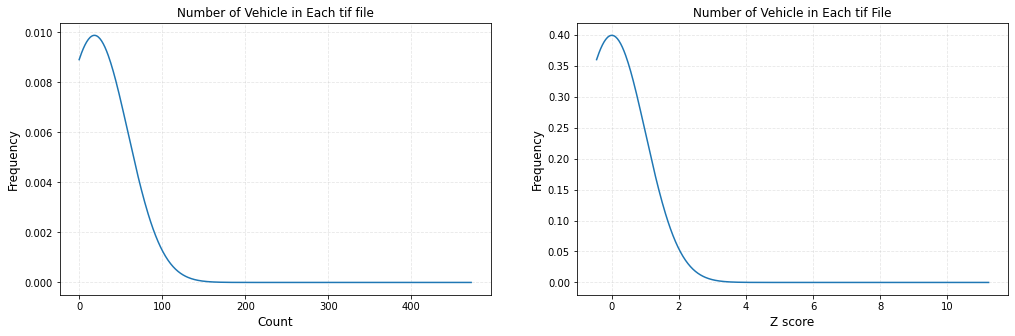

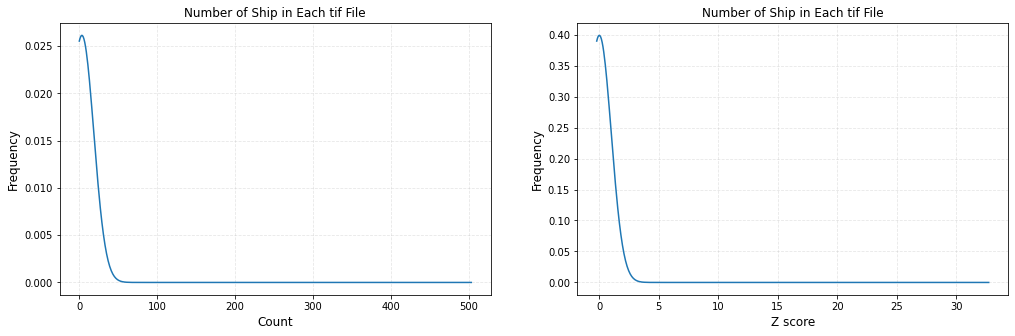

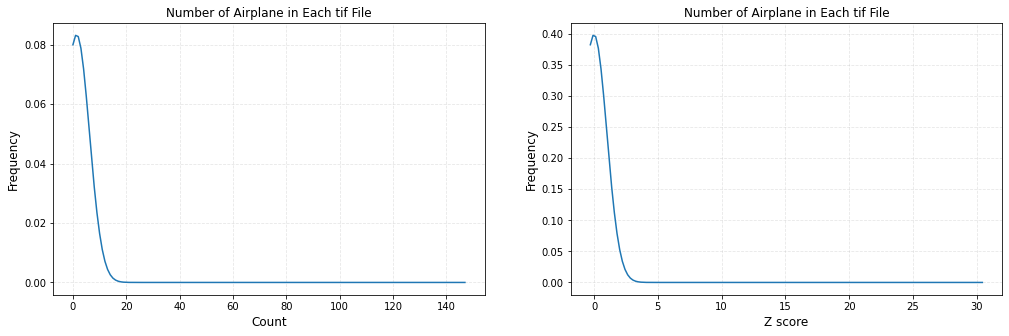

In [ ]:
print(colored("Validation Data", attrs=['bold']))
print()

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(validation_sum_df['total'])
df_std = np.std(validation_sum_df['total'])
 
pdf = stats.norm.pdf(validation_sum_df['total'].sort_values(), df_mean, df_std)

plt.title("Number of Object in Each tif File")
plt.plot(validation_sum_df['total'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(validation_sum_z_score_df['total'])
df_std = np.std(validation_sum_z_score_df['total'])
 
pdf = stats.norm.pdf(validation_sum_z_score_df['total'].sort_values(), df_mean, df_std)

plt.title("Number of Object in Each tif File")
plt.plot(validation_sum_z_score_df['total'].sort_values(), pdf)
plt.xlabel("Z score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_number_of_obejct_distribution_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n" * 2)

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(validation_sum_df['vehicle'])
df_std = np.std(validation_sum_df['vehicle'])
 
pdf = stats.norm.pdf(validation_sum_df['vehicle'].sort_values(), df_mean, df_std)

plt.title("Number of Vehicle in Each tif file")
plt.plot(validation_sum_df['vehicle'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(validation_sum_z_score_df['vehicle'])
df_std = np.std(validation_sum_z_score_df['vehicle'])
 
pdf = stats.norm.pdf(validation_sum_z_score_df['vehicle'].sort_values(), df_mean, df_std)

plt.title("Number of Vehicle in Each tif File")
plt.plot(validation_sum_z_score_df['vehicle'].sort_values(), pdf)
plt.xlabel("Z score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_number_of_vehicle_distribution_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n" * 2)

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(validation_sum_df['ship'])
df_std = np.std(validation_sum_df['ship'])
 
pdf = stats.norm.pdf(validation_sum_df['ship'].sort_values(), df_mean, df_std)

plt.title("Number of Ship in Each tif File")
plt.plot(validation_sum_df['ship'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(validation_sum_z_score_df['ship'])
df_std = np.std(validation_sum_z_score_df['ship'])
 
pdf = stats.norm.pdf(validation_sum_z_score_df['ship'].sort_values(), df_mean, df_std)

plt.title("Number of Ship in Each tif File")
plt.plot(validation_sum_z_score_df['ship'].sort_values(), pdf)
plt.xlabel("Z score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_number_of_ship_distribution_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n" * 2)

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(validation_sum_df['airplane'])
df_std = np.std(validation_sum_df['airplane'])
 
pdf = stats.norm.pdf(validation_sum_df['airplane'].sort_values(), df_mean, df_std)

plt.title("Number of Airplane in Each tif File")
plt.plot(validation_sum_df['airplane'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(validation_sum_z_score_df['airplane'])
df_std = np.std(validation_sum_z_score_df['airplane'])
 
pdf = stats.norm.pdf(validation_sum_z_score_df['airplane'].sort_values(), df_mean, df_std)

plt.title("Number of Airplane in Each tif File")
plt.plot(validation_sum_z_score_df['airplane'].sort_values(), pdf)
plt.xlabel("Z score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_number_of_airplane_distribution_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

Validation Data



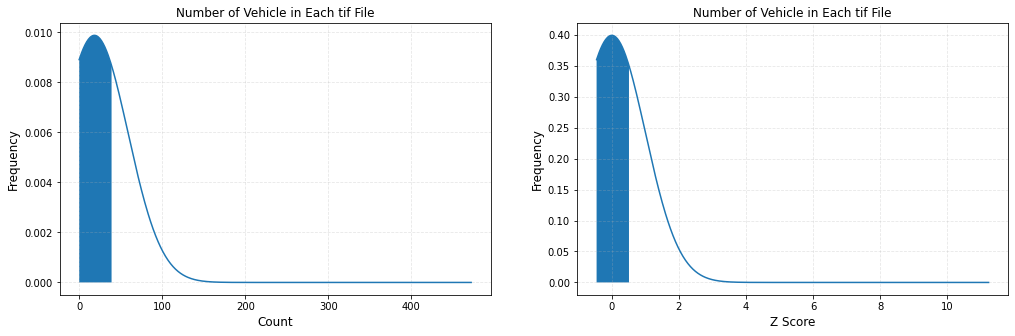

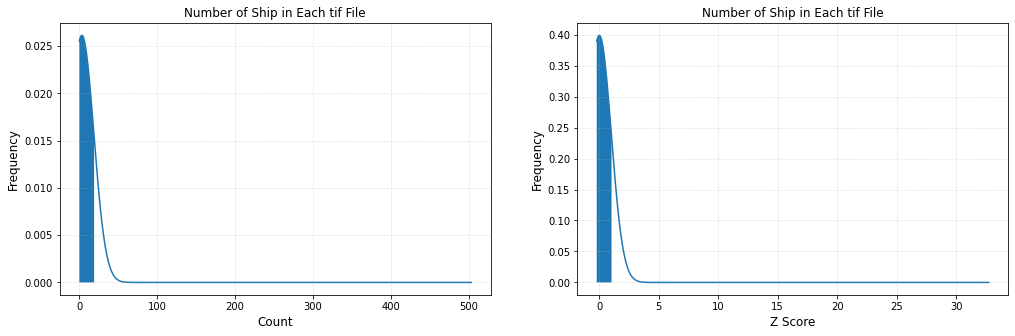

In [ ]:
print(colored("Validation Data", attrs=['bold']))
print()

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(validation_sum_df['vehicle'])
df_std = np.std(validation_sum_df['vehicle'])
 
pdf = stats.norm.pdf(validation_sum_df['vehicle'].sort_values(), df_mean, df_std)
border = validation_sum_df['vehicle'][(validation_sum_df['vehicle'] == 40)].index[0]
z = list(validation_sum_df['vehicle'].sort_values()[validation_sum_df['vehicle'].sort_values() < validation_sum_df['vehicle'][border]])
mu = np.mean(validation_sum_df['vehicle'])
sigma = stats.tstd(validation_sum_df['vehicle'])
plt.fill_between(z, 0, norm.pdf(z, mu, sigma))

plt.title("Number of Vehicle in Each tif File")
plt.plot(validation_sum_df['vehicle'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(validation_sum_z_score_df['vehicle'])
df_std = np.std(validation_sum_z_score_df['vehicle'])
 
pdf = stats.norm.pdf(validation_sum_z_score_df['vehicle'].sort_values(), df_mean, df_std)
border = validation_sum_df['vehicle'][(validation_sum_df['vehicle'] == 40)].index[0]
z = list(validation_sum_z_score_df['vehicle'].sort_values()[validation_sum_z_score_df['vehicle'].sort_values() < validation_sum_z_score_df['vehicle'][border]])
mu = np.mean(validation_sum_z_score_df['vehicle'])
sigma = stats.tstd(validation_sum_z_score_df['vehicle'])
plt.fill_between(z, 0, norm.pdf(z, mu, sigma))

plt.title("Number of Vehicle in Each tif File")
plt.plot(validation_sum_z_score_df['vehicle'].sort_values(), pdf)
plt.xlabel("Z Score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_number_of_vehicle_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n" * 2)

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
df_mean = np.mean(validation_sum_df['ship'])
df_std = np.std(validation_sum_df['ship'])
 
pdf = stats.norm.pdf(validation_sum_df['ship'].sort_values(), df_mean, df_std)
border = validation_sum_df['ship'][(validation_sum_df['ship'] == 20)].index[0]
z = list(validation_sum_df['ship'].sort_values()[validation_sum_df['ship'].sort_values() < validation_sum_df['ship'][border]])
mu = np.mean(validation_sum_df['ship'])
sigma = stats.tstd(validation_sum_df['ship'])
plt.fill_between(z, 0, norm.pdf(z, mu, sigma))

plt.title("Number of Ship in Each tif File")
plt.plot(validation_sum_df['ship'].sort_values(), pdf)
plt.xlabel("Count", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")

plt.subplot(1,2,2)
df_mean = np.mean(validation_sum_z_score_df['ship'])
df_std = np.std(validation_sum_z_score_df['ship'])
 
pdf = stats.norm.pdf(validation_sum_z_score_df['ship'].sort_values(), df_mean, df_std)
border = validation_sum_df['ship'][(validation_sum_df['ship'] == 20)].index[0]
z = list(validation_sum_z_score_df['ship'].sort_values()[validation_sum_z_score_df['ship'].sort_values() < validation_sum_z_score_df['ship'][border]])
mu = np.mean(validation_sum_z_score_df['ship'])
sigma = stats.tstd(validation_sum_z_score_df['ship'])
plt.fill_between(z, 0, norm.pdf(z, mu, sigma))

plt.title("Number of Ship in Each tif File")
plt.plot(validation_sum_z_score_df['ship'].sort_values(), pdf)
plt.xlabel("Z Score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_number_of_ship_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

In [ ]:
validation_sum_sampling_df = validation_sum_df[(((validation_sum_df['vehicle'] > 0) & (validation_sum_df['vehicle'] <= 40)) |
                                          ((validation_sum_df['ship'] > 0) & (validation_sum_df['ship'] <= 20)))]
                                          
validation_sum_detailed_sampling_df = validation_df.iloc[validation_sum_sampling_df.index]

In [ ]:
validation_sum_sampling_df 

,file,vehicle,ship,airplane,total
0,0.tif,0,1,0,1
1,1.tif,20,0,0,20
3,3.tif,0,3,0,3
5,5.tif,0,1,0,1
6,6.tif,19,0,0,19
...,...,...,...,...,...
8280,8280.tif,0,9,0,9
8281,8281.tif,14,0,0,14
8282,8282.tif,0,1,0,1
8283,8283.tif,0,1,0,1


##Samping by Image Size

In [ ]:
validation_image_size_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/eda/image_size/df/validation_image_size_df.csv')

In [ ]:
print(colored("Validation Data", attrs=['bold']))
print()
print(validation_image_size_df['size'].unique())

Validation Data

['(1000, 1000)' '(600, 800)' '(800, 600)' '(600, 600)' '(800, 800)'
 '(4000, 4000)' '(6000, 6000)' '(3355, 4000)' '(7000, 7000)'
 '(8000, 8000)' '(9472, 10000)' '(6614, 6466)' '(6421, 6215)'
 '(5836, 2676)' '(9000, 9000)' '(3422, 4000)' '(5598, 3034)'
 '(5484, 5383)' '(5847, 3182)' '(6971, 6716)' '(6567, 6309)'
 '(4278, 5332)' '(5534, 2949)' '(6583, 3762)' '(4262, 7000)'
 '(5787, 5421)' '(6075, 3054)']


In [ ]:
validation_image_sampling_df = validation_image_size_df[((validation_image_size_df['size'] == '(600, 600)') | (validation_image_size_df['size'] == '(600, 800)') |
                                                         (validation_image_size_df['size'] == '(800, 600)') | (validation_image_size_df['size'] == '(800, 800)') |
                                                         (validation_image_size_df['size'] == '(1000, 1000)'))]

In [ ]:
validation_sampling_index = list(set(validation_image_sampling_df.index) & set(validation_sum_sampling_df.index))
validation_sampling_index = sorted(validation_sampling_index, reverse=False)
validation_sum_image_sampling_df = validation_sum_sampling_df.loc[validation_sampling_index]

validation_sum_image_detailed_sampling_df = validation_df.iloc[validation_sum_image_sampling_df.index]

In [ ]:
validation_sampling_class_sum_df = pd.DataFrame(validation_sum_image_sampling_df.sum()).reset_index().drop([0, 4])
validation_sampling_class_sum_df.columns = ['value', 'count']

validation_sampling_detailed_class_sum_df = pd.DataFrame(validation_sum_image_detailed_sampling_df.sum()).reset_index().drop([0, 34])
validation_sampling_detailed_class_sum_df.columns = ['value', 'count']
validation_sampling_detailed_class_sum_df = validation_sampling_detailed_class_sum_df.drop([31,32,33]) 
validation_sampling_vehicle_class_sum_df = validation_sampling_detailed_class_sum_df[validation_sampling_detailed_class_sum_df['value'].str.contains('|'.join(vehicle_list))]
validation_sampling_ship_class_sum_df = validation_sampling_detailed_class_sum_df[validation_sampling_detailed_class_sum_df['value'].str.contains('|'.join(ship_list))]
validation_sampling_airplane_class_sum_df = validation_sampling_detailed_class_sum_df[validation_sampling_detailed_class_sum_df['value'].str.contains('|'.join(airplane_list))]

In [ ]:
validation_sampling_class_sum_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/count/validation_class_sampling_count.csv', index = False)
validation_sampling_detailed_class_sum_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/count/validation_detailed_class_sampling_count.csv', index = False)
validation_sampling_vehicle_class_sum_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/count/validation_vehicle_sampling_count.csv', index = False)
validation_sampling_ship_class_sum_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/count/validation_ship_sampling_count.csv', index = False)
validation_sampling_airplane_class_sum_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/count/validation_airplane_sampling_count.csv', index = False)

##Sampling Data Information

Validation Data



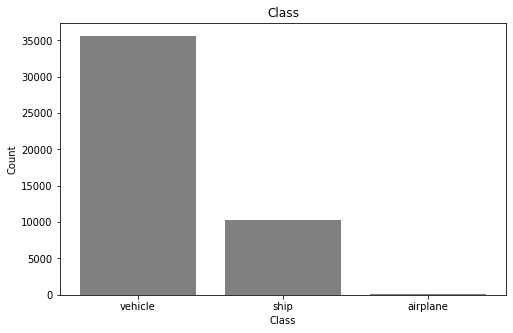

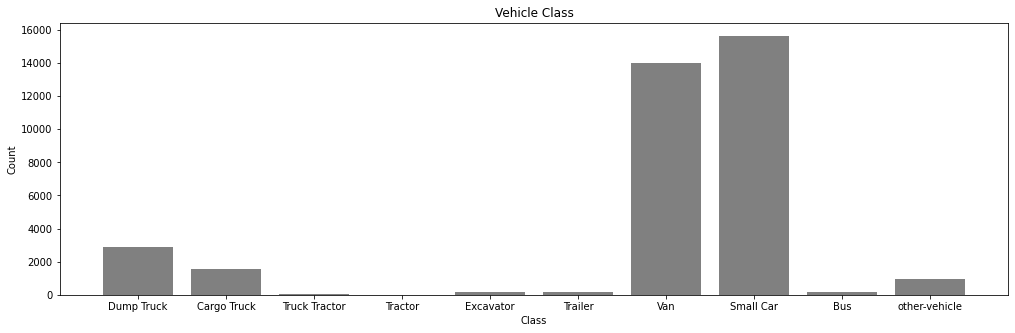

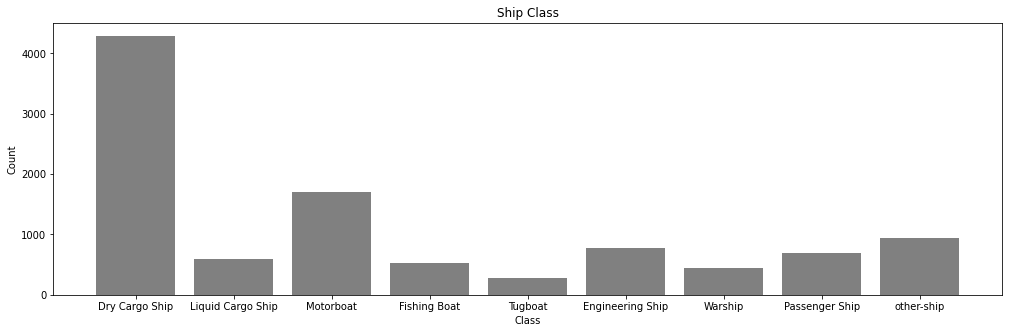

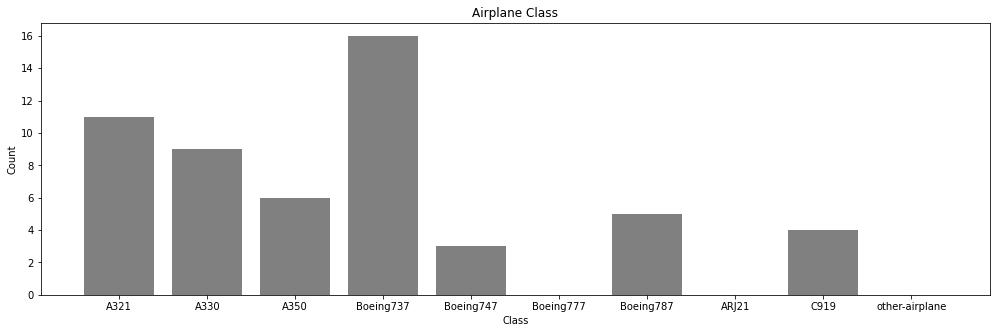

In [ ]:
print(colored("Validation Data", attrs=['bold']))
print()

xs = validation_sampling_class_sum_df.value.to_list()
ys = validation_sampling_class_sum_df['count'].to_list()

plt.figure(figsize=(8, 5))
plt.title('Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.bar(xs, ys, width=0.8, color='gray')
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_class_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n"*2)

xs = validation_sampling_vehicle_class_sum_df.value.to_list()
ys = validation_sampling_vehicle_class_sum_df['count'].to_list()

plt.figure(figsize=(17, 5))
plt.title('Vehicle Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.bar(xs, ys, width=0.8, color='gray')
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_vehicle_class_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n"*2)

xs = validation_sampling_ship_class_sum_df.value.to_list()
ys = validation_sampling_ship_class_sum_df['count'].to_list()

plt.figure(figsize=(17, 5))
plt.title('Ship Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.bar(xs, ys, width=0.8, color='gray')
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_ship_class_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()
print("\n"*2)

xs =validation_sampling_airplane_class_sum_df.value.to_list()
ys =validation_sampling_airplane_class_sum_df['count'].to_list()

plt.figure(figsize=(17, 5))
plt.title('Airplane Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.bar(xs, ys, width=0.8, color='gray')
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_airplane_class_sampling_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

#Train Data File I/O

In [ ]:
train_sampling_tif = list(train_sum_image_sampling_df['file'])
print("Data Size:", len(train_sampling_tif))

Data Size: 7595


In [ ]:
train_vehicle_ship_sampling_df = train_sum_image_sampling_df[((train_sum_image_sampling_df['vehicle'] > 0) & (train_sum_image_sampling_df['ship'] > 0))]
train_vehicle_sampling_df = train_sum_image_sampling_df[((train_sum_image_sampling_df['vehicle'] > 0) & (train_sum_image_sampling_df['ship'] == 0))]
train_ship_sampling_df = train_sum_image_sampling_df[((train_sum_image_sampling_df['vehicle'] == 0) & (train_sum_image_sampling_df['ship'] > 0))]

In [ ]:
train_sum_image_sampling_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/train_sum_image_sampling.csv', index = False)
train_vehicle_ship_sampling_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/train_vehicle_ship_sampling.csv', index = False)
train_vehicle_sampling_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/train_vehicle_sampling.csv', index = False)
train_ship_sampling_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/train_ship_sampling.csv', index = False)

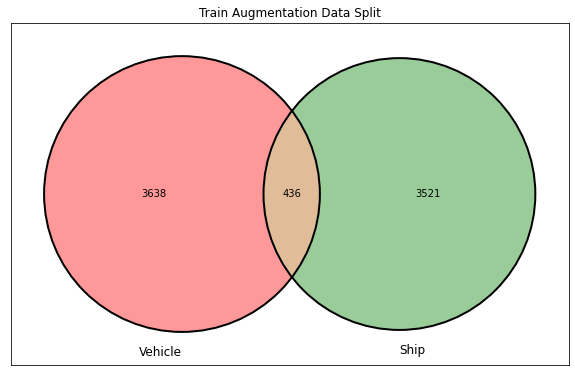

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,8)
A = set((train_sum_image_sampling_df[(train_sum_image_sampling_df['vehicle'] > 0)]['file']))
B = set((train_sum_image_sampling_df[(train_sum_image_sampling_df['ship'] > 0)]['file']))
v = venn2(subsets=[A, B], set_labels=('Vehicle', 'Ship'))
c = venn2_circles(subsets=[A, B], linestyle='solid')
plt.title("Train Augmentation Data Split")
plt.gca().set_facecolor("white")
plt.gca().set_axis_on()
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_augmentation_data_split_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

In [ ]:
def make_tif_txt_path(sampling_tif, tif_folder, txt_folder):
  sampling_tif_path = []
  for tif_file in sampling_tif:
    tif_path = tif_folder + tif_file
    sampling_tif_path.append(tif_path)

  sampling_txt = []
  for tif_name in sampling_tif:
    txt_name = tif_name.replace('tif', 'txt')
    sampling_txt.append(txt_name)

  sampling_txt_path = []
  for txt_file in sampling_txt:
    txt_path = txt_folder + txt_file
    sampling_txt_path.append(txt_path)

  return sampling_tif_path, sampling_txt, sampling_txt_path

In [ ]:
def sampling_file_copy(sampling_file_path, sampling_file, sampling_folder):
  for file_path, file_name in zip(sampling_file_path, sampling_file):
    source = file_path
    destination = sampling_folder + file_name
    shutil.copy(source, destination)

In [ ]:
data_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/'
train_vehicle_ship_sampling_tif = list(train_vehicle_ship_sampling_df['file'])
train_vehicle_sampling_tif = list(train_vehicle_sampling_df['file'])
train_ship_sampling_tif = list(train_ship_sampling_df['file'])

train_vehicle_ship_sampling_tif_path, train_vehicle_ship_sampling_txt, train_vehicle_ship_sampling_txt_path \
= make_tif_txt_path(train_vehicle_ship_sampling_tif, data_folder + 'images_train/', data_folder + 'train_super/')
train_vehicle_sampling_tif_path, train_vehicle_sampling_txt, train_vehicle_sampling_txt_path \
= make_tif_txt_path(train_vehicle_sampling_tif, data_folder + 'images_train/', data_folder + 'train_super/')
train_ship_sampling_tif_path, train_ship_sampling_txt, train_ship_sampling_txt_path \
= make_tif_txt_path(train_ship_sampling_tif, data_folder + 'images_train/', data_folder + 'train_super/')

In [ ]:
train_vehicle_ship_sampling_tif_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_train_vehicle_ship_tif/'
train_vehicle_ship_sampling_txt_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_train_vehicle_ship_txt/'
train_vehicle_sampling_tif_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_train_vehicle_tif/'
train_vehicle_sampling_txt_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_train_vehicle_txt/'
train_ship_sampling_tif_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_train_ship_tif/'
train_ship_sampling_txt_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_train_ship_txt/'

train_sampling_file_path_list = [train_vehicle_ship_sampling_tif_path, train_vehicle_ship_sampling_txt_path,
                           train_vehicle_sampling_tif_path, train_vehicle_sampling_txt_path,
                           train_ship_sampling_tif_path, train_ship_sampling_txt_path]

train_sampling_file_list = [train_vehicle_ship_sampling_tif, train_vehicle_ship_sampling_txt,
                           train_vehicle_sampling_tif, train_vehicle_sampling_txt,
                           train_ship_sampling_tif, train_ship_sampling_txt]

train_sampling_folder_list = [train_vehicle_ship_sampling_tif_folder, train_vehicle_ship_sampling_txt_folder,
                           train_vehicle_sampling_tif_folder, train_vehicle_sampling_txt_folder,
                           train_ship_sampling_tif_folder, train_ship_sampling_txt_folder]

for i, j, k in zip(train_sampling_file_path_list, train_sampling_file_list, train_sampling_folder_list):
  sampling_file_copy(i, j, k)

#Validation Data File I/O

In [ ]:
validation_sampling_tif = list(validation_sum_image_sampling_df['file'])
print("Data Size:", len(validation_sampling_tif))

Data Size: 3829


In [ ]:
validation_vehicle_ship_sampling_df = validation_sum_image_sampling_df[((validation_sum_image_sampling_df['vehicle'] > 0) & (validation_sum_image_sampling_df['ship'] > 0))]
validation_vehicle_sampling_df = validation_sum_image_sampling_df[((validation_sum_image_sampling_df['vehicle'] > 0) & (validation_sum_image_sampling_df['ship'] == 0))]
validation_ship_sampling_df = validation_sum_image_sampling_df[((validation_sum_image_sampling_df['vehicle'] == 0) & (validation_sum_image_sampling_df['ship'] > 0))]

In [ ]:
validation_sum_image_sampling_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/validation_sum_image_sampling.csv', index = False)
validation_vehicle_ship_sampling_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/validation_vehicle_ship_sampling.csv', index = False)
validation_vehicle_sampling_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/validation_vehicle_sampling.csv', index = False)
validation_ship_sampling_df.to_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/validation_ship_sampling.csv', index = False)

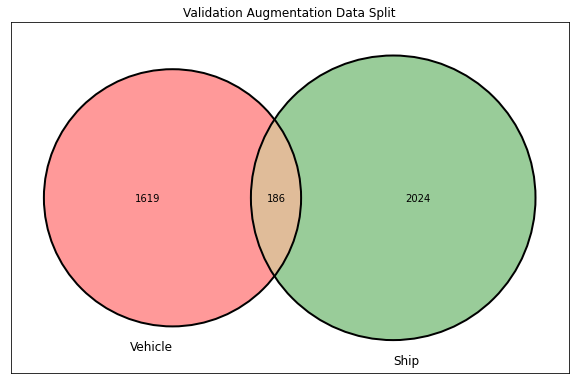

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,8)
A = set((validation_sum_image_sampling_df[(validation_sum_image_sampling_df['vehicle'] > 0)]['file']))
B = set((validation_sum_image_sampling_df[(validation_sum_image_sampling_df['ship'] > 0)]['file']))
v = venn2(subsets=[A, B], set_labels=('Vehicle', 'Ship'))
c = venn2_circles(subsets=[A, B], linestyle='solid')
plt.title("Validation Augmentation Data Split")
plt.gca().set_facecolor("white")
plt.gca().set_axis_on()
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_augmentation_data_split_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

In [ ]:
data_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/'
validation_vehicle_ship_sampling_tif = list(validation_vehicle_ship_sampling_df['file'])
validation_vehicle_sampling_tif = list(validation_vehicle_sampling_df['file'])
validation_ship_sampling_tif = list(validation_ship_sampling_df['file'])

validation_vehicle_ship_sampling_tif_path, validation_vehicle_ship_sampling_txt, validation_vehicle_ship_sampling_txt_path \
= make_tif_txt_path(validation_vehicle_ship_sampling_tif, data_folder + 'images_val/', data_folder + 'val_super/')
validation_vehicle_sampling_tif_path, validation_vehicle_sampling_txt, validation_vehicle_sampling_txt_path \
= make_tif_txt_path(validation_vehicle_sampling_tif, data_folder + 'images_val/', data_folder + 'val_super/')
validation_ship_sampling_tif_path, validation_ship_sampling_txt, validation_ship_sampling_txt_path \
= make_tif_txt_path(validation_ship_sampling_tif, data_folder + 'images_val/', data_folder + 'val_super/')

In [ ]:
validation_vehicle_ship_sampling_tif_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_validation_vehicle_ship_tif/'
validation_vehicle_ship_sampling_txt_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_validation_vehicle_ship_txt/'
validation_vehicle_sampling_tif_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_validation_vehicle_tif/'
validation_vehicle_sampling_txt_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_validation_vehicle_txt/'
validation_ship_sampling_tif_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_validation_ship_tif/'
validation_ship_sampling_txt_folder = '/content/drive/MyDrive/Aiffelthon/data_augmentation/data/sampling_validation_ship_txt/'

validation_sampling_file_path_list = [validation_vehicle_ship_sampling_tif_path, validation_vehicle_ship_sampling_txt_path,
                                      validation_vehicle_sampling_tif_path, validation_vehicle_sampling_txt_path,
                                      validation_ship_sampling_tif_path, validation_ship_sampling_txt_path]

validation_sampling_file_list = [validation_vehicle_ship_sampling_tif, validation_vehicle_ship_sampling_txt,
                                 validation_vehicle_sampling_tif, validation_vehicle_sampling_txt,
                                 validation_ship_sampling_tif, validation_ship_sampling_txt]

validation_sampling_folder_list = [validation_vehicle_ship_sampling_tif_folder, validation_vehicle_ship_sampling_txt_folder,
                                   validation_vehicle_sampling_tif_folder, validation_vehicle_sampling_txt_folder,
                                   validation_ship_sampling_tif_folder, validation_ship_sampling_txt_folder]

for i, j, k in zip(validation_sampling_file_path_list, validation_sampling_file_list, validation_sampling_folder_list):
  sampling_file_copy(i, j, k)